In [1]:
from datetime import datetime
from csv import DictReader
import numpy as np
import time
import operator
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('bmh')

def datestr2num(ts):
    return datetime.utcfromtimestamp(int(ts)).strftime('%Y-%m-%d')
    
#init
np.set_printoptions(suppress=True)
start_time = time.time()
#folder = 'podatki/ml-latest-small/'
#podatke smo morali popraviti na viru, problematični znaki '-', '#', ',' 
terrorism = np.loadtxt('TerroristAttacks.csv', dtype='str', delimiter="|", skiprows = 2, encoding="ISO-8859-1")

print(terrorism[len(terrorism)-1])

['201712310032' '2017' '12' '31' '0' '' 'Philippines' 'Southeast Asia'
 'Maguindanao' 'Cotabato City' '7.209594' '124.241966' '' '0' '0' '0'
 'Bombing/Explosion' 'Unknown' 'Unknown' 'Philippines' 'Explosives'
 'An explosive device containing a detonating cord, a battery, and a blasting cap was used in the attack.'
 '0' '0' '' '']


Text(0.5, 1.0, 'Number Of Attacks Per Year')

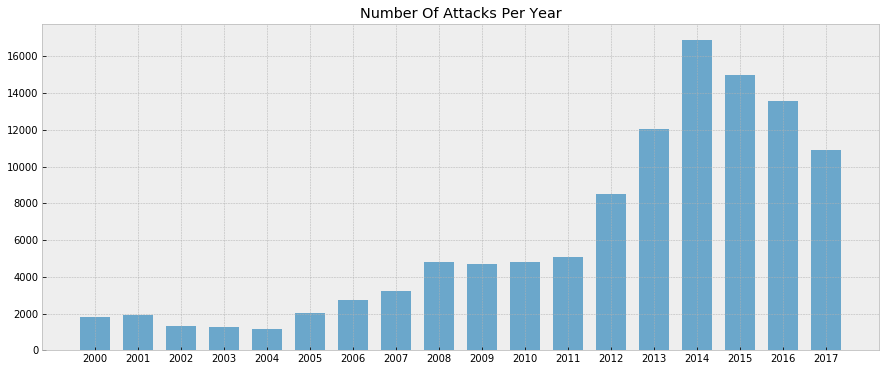

In [24]:
from collections import defaultdict

#seznam let
years = terrorism[:, 1]

number_of_attacks = defaultdict(int)

#slovar leto:št_napadov
for year in years:
    if(int(year) >= 2000):
        number_of_attacks[year] += 1
    
fig, axes = plt.subplots(1, 1, figsize=(15, 6))
axes.bar(number_of_attacks.keys(), number_of_attacks.values(), align="center", width=0.7, alpha=0.7)
axes.set_title("Number Of Attacks Per Year")